<a href="https://colab.research.google.com/github/nexenrnd/python/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader
!pip install pmdarima

In [2]:
import os

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [9]:
data = pd.read_csv('/content/drive/Shareddrives/ATAF/AirPassengers.csv')
data = data.rename(columns={'Month': 'month', '#Passengers': 'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


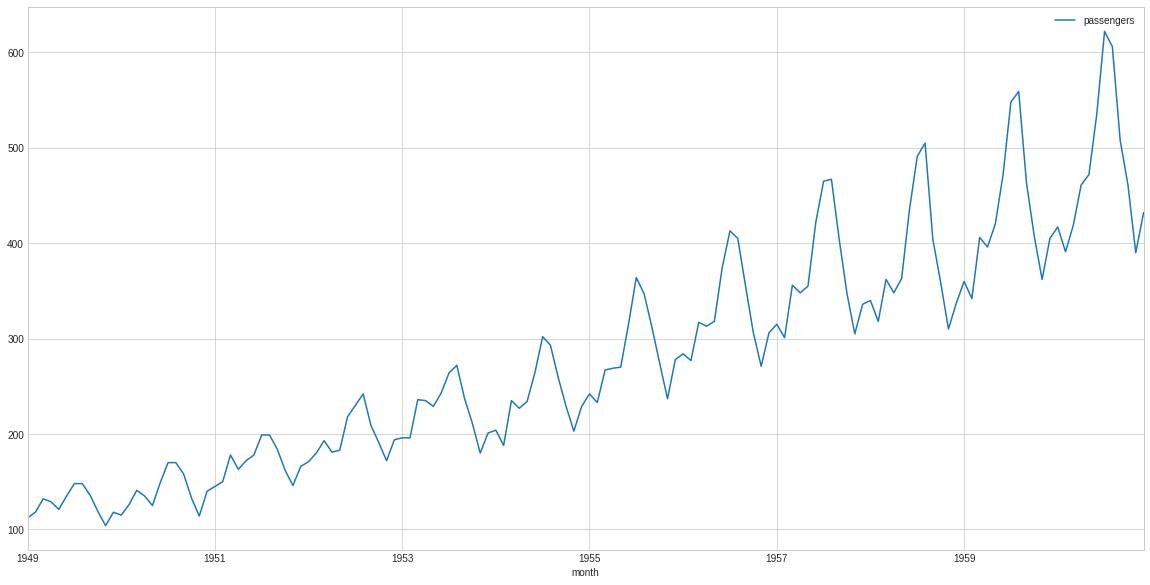

In [10]:
#1. Data Pre-processing
fig = data.plot(figsize=(20,10))

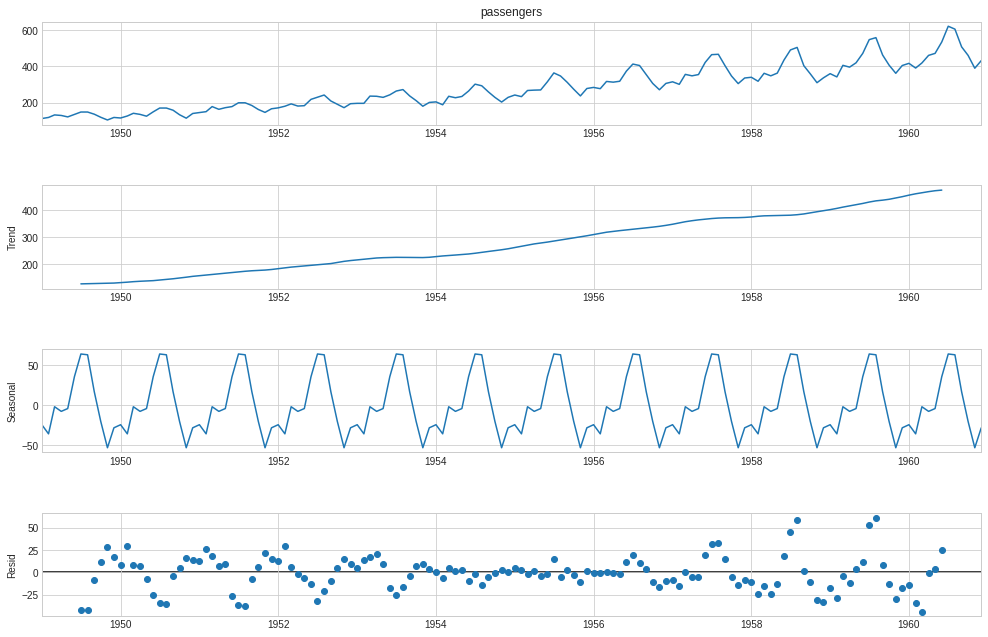

In [11]:
# Seasonal decomposition using a simple moving average
# Observed, Trend, Seasonal, Residuals

decomposition = sm.tsa.seasonal_decompose(data['passengers'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()

In [12]:
# Data Split
# Since it is a time-series, we Do Not Shuffle!!
test_proportion = 0.3

train_data, test_data = train_test_split(data, test_size=test_proportion, shuffle=False)

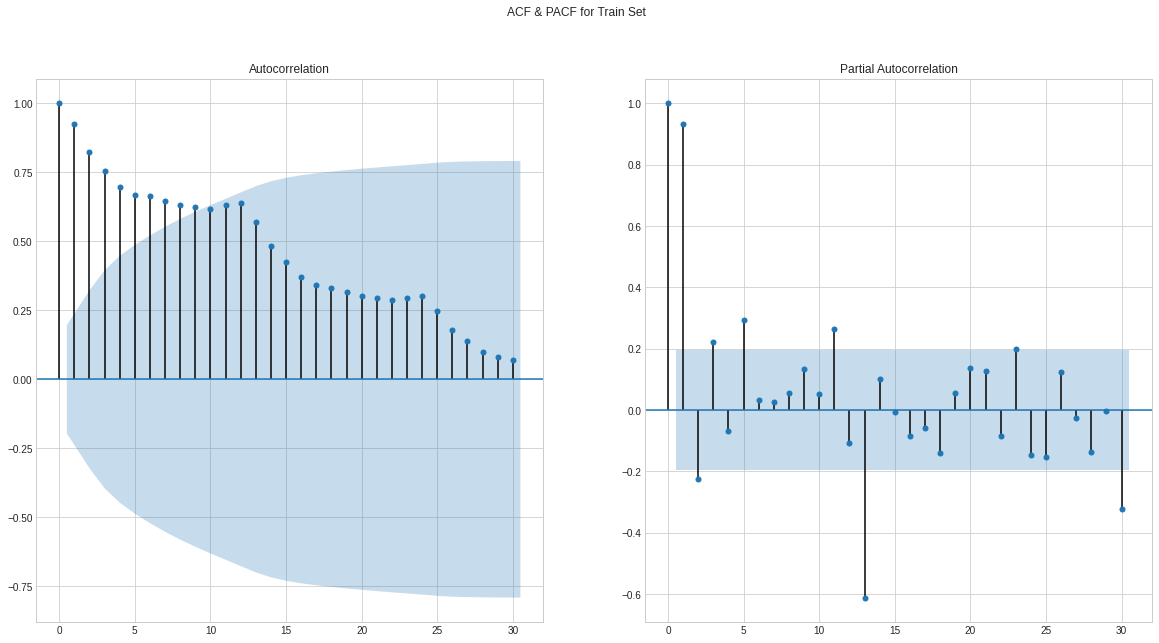

In [13]:
# ACF / PACF
fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('ACF & PACF for Train Set')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

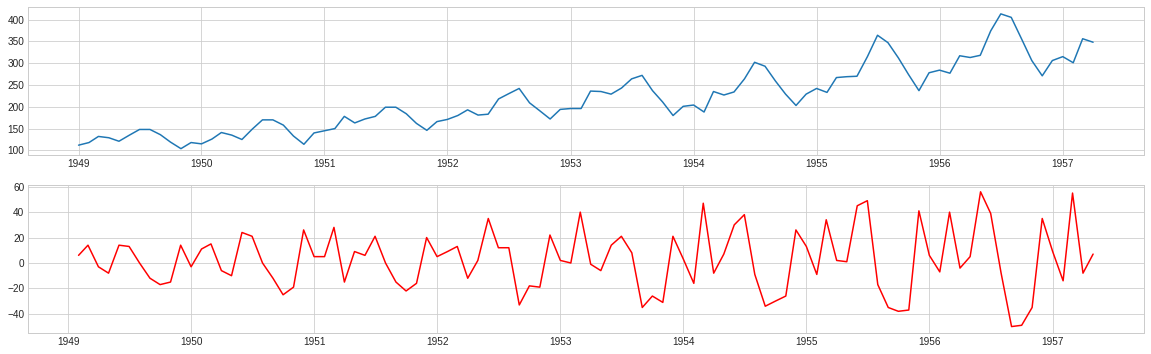

In [14]:
# Differencing
diff_data = data.diff().dropna()
train_diff_data, test_diff_data = train_test_split(diff_data, test_size=test_proportion, shuffle=False)

plt.figure(figsize=(20,6))
plt.subplot(211)
plt.plot(train_data)
plt.subplot(212)
plt.plot(train_diff_data, color='r')

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


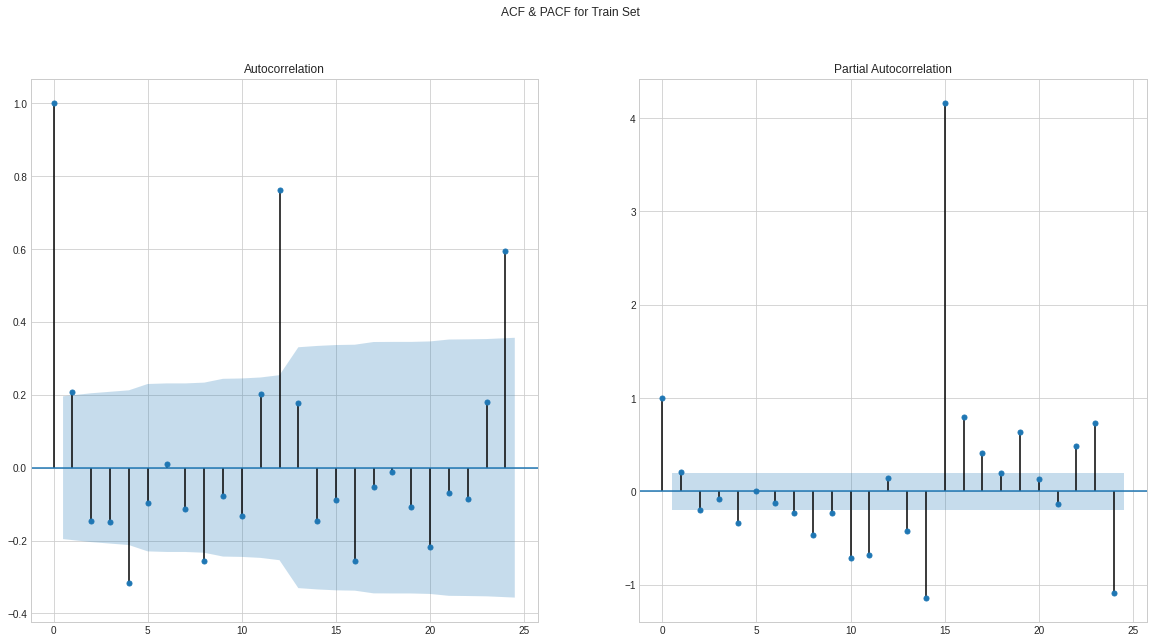

In [15]:
# ACF / PACF
fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('ACF & PACF for Train Set')
sm.graphics.tsa.plot_acf(train_diff_data.values.squeeze(), lags=24, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_diff_data.values.squeeze(), lags=24, ax=ax[1]);

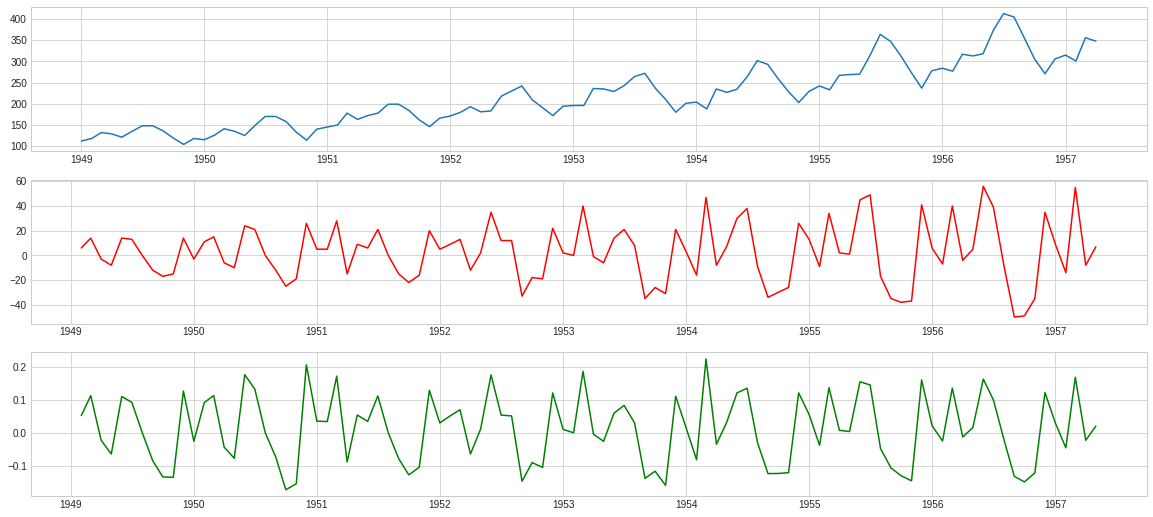

In [16]:
# Log transform + Differencing
log_diff_data = np.log(data).diff().dropna()
train_log_diff_data, test_log_diff_data = train_test_split(log_diff_data, test_size=test_proportion, shuffle=False)

plt.figure(figsize=(20,9))
plt.subplot(311)
plt.plot(train_data)
plt.subplot(312)
plt.plot(train_diff_data, color='r')
plt.subplot(313)
plt.plot(train_log_diff_data, color='g')

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


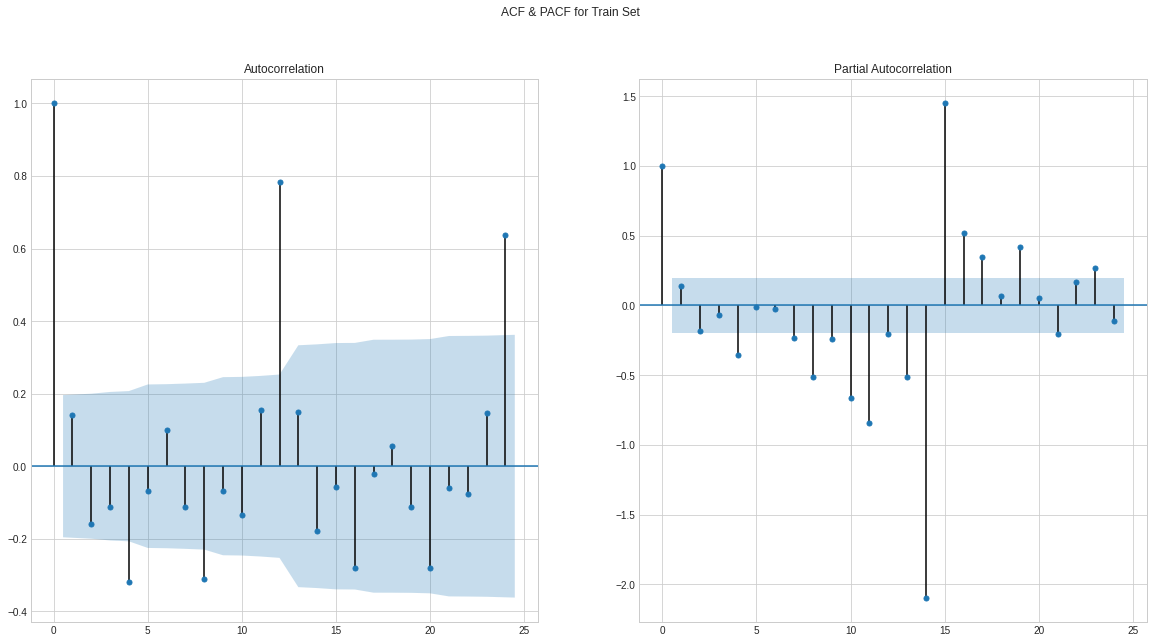

In [17]:
# ACF / PACF
fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('ACF & PACF for Train Set')
sm.graphics.tsa.plot_acf(train_log_diff_data.values.squeeze(), lags=24, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_log_diff_data.values.squeeze(), lags=24, ax=ax[1]);

In [18]:
# Stationarity Test: ADF
res_adf_raw = adfuller(train_data['passengers'])
res_adf_diff = adfuller(train_diff_data['passengers'])
res_adf_log_diff = adfuller(train_log_diff_data['passengers'])
print('ADF P-value for raw: %f' % res_adf_raw[1])
print('ADF P-value for raw: %f' % res_adf_diff[1])
print('ADF P-value for raw: %f' % res_adf_log_diff[1])

ADF P-value for raw: 0.997560
ADF P-value for raw: 0.197102
ADF P-value for raw: 0.068250


In [19]:
# Stationarity Test: KPSS

res_kpss_raw = kpss(train_data['passengers'], lags='auto')
res_kpss_diff = kpss(train_diff_data['passengers'], lags='auto')
res_kpss_log_diff = kpss(train_log_diff_data['passengers'], lags='auto')
print('KPSS P-value for raw: %f' % res_kpss_raw[1])
print('KPSS P-value for diff: %f' % res_kpss_diff[1])
print('KPSS P-value for diff: %f' % res_kpss_log_diff[1])

KPSS P-value for raw: 0.010000
KPSS P-value for diff: 0.100000
KPSS P-value for diff: 0.100000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/l

In [20]:
# ARIMA Model
res_arima = auto_arima(train_data, m=12, seasonal=False,
                      start_p=1, max_p=12, start_q=1, max_q=12,
                      trace=True, error_action='ignore',
                      suppress_warnings=True, stepwise=False)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.769, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=904.979, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=907.370, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=900.136, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=904.858, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=906.463, Time=0.09 sec


In [21]:
res_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -442.242
Date:                Tue, 06 Apr 2021   AIC                            896.484
Time:                        13:32:24   BIC                            912.055
Sample:                             0   HQIC                           902.784
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9832      2.376      1.255      0.209      -1.674       7.641
ar.L1          0.2235      0.094      2.376      0.018       0.039       0.408
ar.L2         -0.2781      0.113     -2.454      0.014      -0.500      -0.056
ar.L3          0.0400      0.094      0.426      0.670      -0.144       0.224
ar.L4         -0.3472      0.078     -4.428      0.000      -0.501      -0.194
sigma2       441.2590     86.309      5.113      0.000     272.097     610.421
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.55
Prob(Q):                              0.95   Prob(JB):                         0.10
Heteroskedasticity (H):               3.73   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

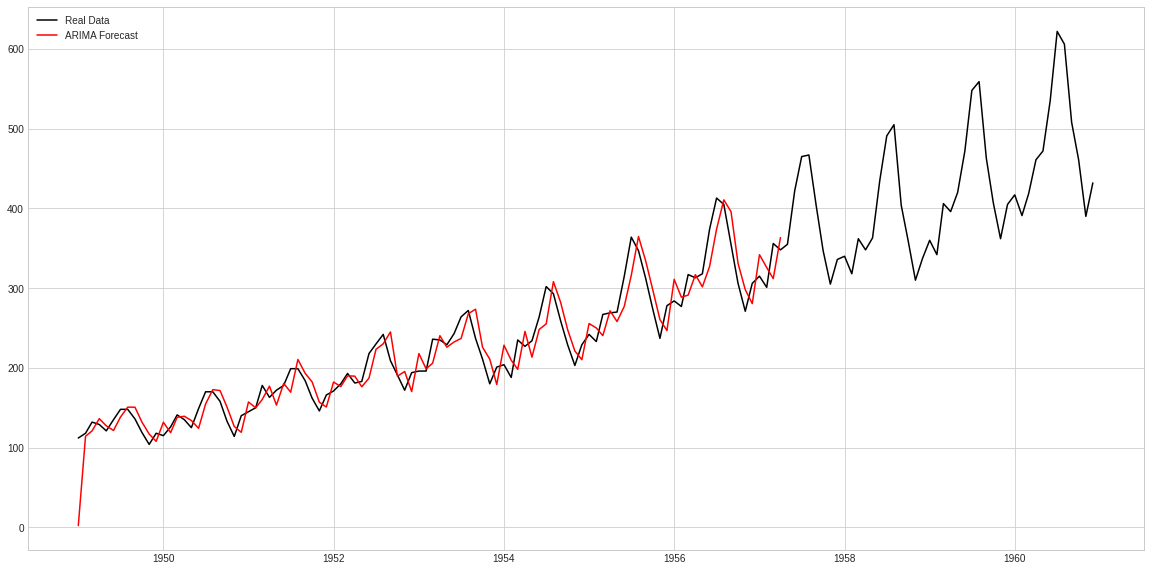

In [23]:
fit_arima_value_tbl = pd.DataFrame(res_arima.predict_in_sample(), index=train_data.index)

plt.figure(figsize=(20,10))
plt.plot(data, label='Real Data', color='k')
plt.plot(fit_arima_value_tbl, label='ARIMA Forecast', color='r')
plt.legend(loc='upper left')
plt.show()

In [24]:
log_data = np.log(data)
train_log_data, test_log_data = train_test_split(log_data, test_size=test_proportion, shuffle=False)

# ARIMA Model
res_arima_log = auto_arima(train_log_data, m=12, seasonal=False,
                      start_p=1, max_p=12, start_q=1, max_q=12,
                      trace=True, error_action='ignore',
                      suppress_warnings=True, stepwise=False)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-165.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-166.640, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-191.632, Time=0.44 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-190.475, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-165.650, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-169.537, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-184.686, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-190.028, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-167.161, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-185.020, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept  

In [25]:
res_arima_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 4)   Log Likelihood                 101.816
Date:                Tue, 06 Apr 2021   AIC                           -191.632
Time:                        13:41:45   BIC                           -176.062
Sample:                             0   HQIC                          -185.332
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0111      0.001      8.236      0.000       0.008       0.014
ma.L1          0.0137      0.137      0.100      0.921      -0.256       0.283
ma.L2         -0.3442      0.157     -2.190      0.028      -0.652      -0.036
ma.L3         -0.1629      0.147     -1.107      0.268      -0.452       0.126
ma.L4         -0.4521      0.131     -3.458      0.001      -0.708      -0.196
sigma2         0.0072      0.002      4.084      0.000       0.004       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 4.98
Prob(Q):                              0.57   Prob(JB):                         0.08
Heteroskedasticity (H):               0.81   Skew:                             0.26
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

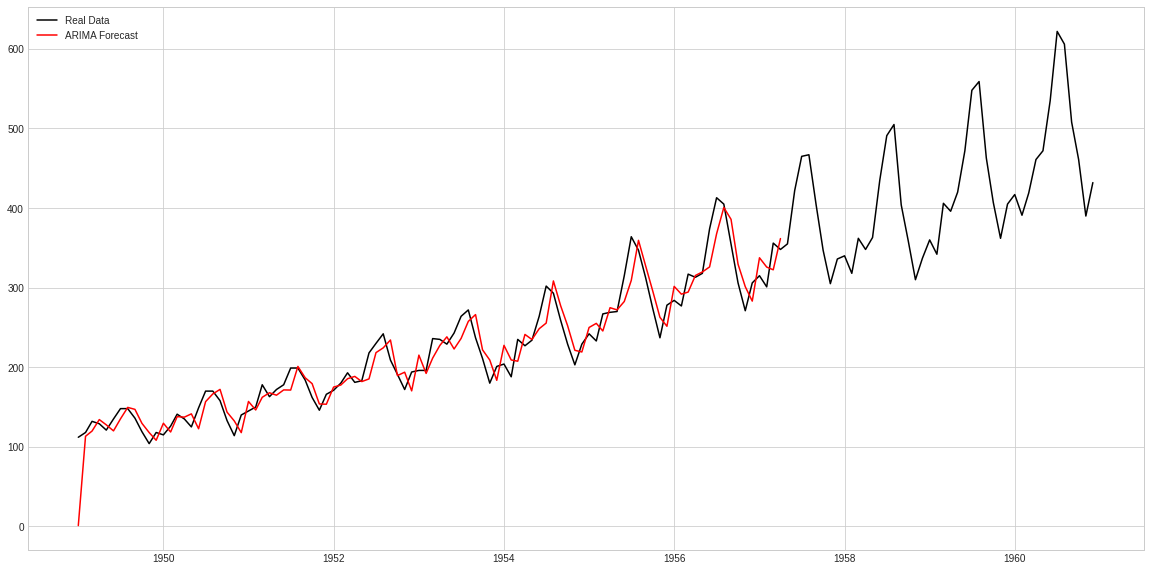

In [27]:
fit_arima_log_value_tbl = pd.DataFrame(np.exp(res_arima_log.predict_in_sample()), index=train_data.index)

plt.figure(figsize=(20,10))
plt.plot(data, label='Real Data', color='k')
plt.plot(fit_arima_log_value_tbl, label='ARIMA Forecast', color='r')
plt.legend(loc='upper left')
plt.show()

[]

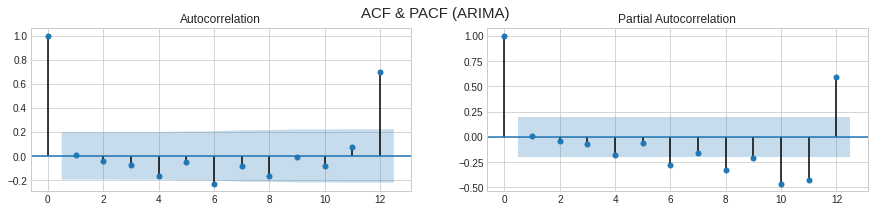

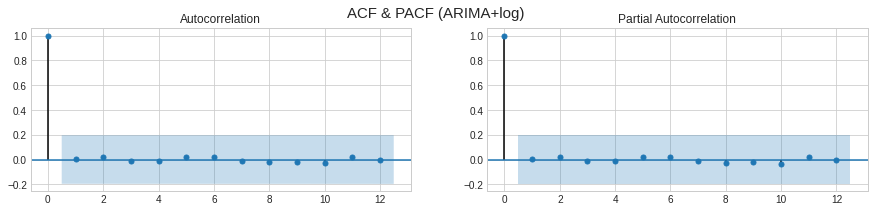

In [29]:
# ACF / PACF
fig, ax = plt.subplots(1,2,figsize=(15,3))
fig.suptitle('ACF & PACF (ARIMA)', size=15)
sm.graphics.tsa.plot_acf(res_arima.resid()[1:], lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(res_arima.resid()[1:], lags=12, ax=ax[1]);
plt.plot()

fig, ax = plt.subplots(1,2,figsize=(15,3))
fig.suptitle('ACF & PACF (ARIMA+log)', size=15)
sm.graphics.tsa.plot_acf(res_arima_log.resid(), lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(res_arima_log.resid(), lags=12, ax=ax[1]);
plt.plot()

In [32]:
# Stationarity test for Residuals

res_adf_resid_arima = adfuller(res_arima.resid()[1:])
res_adf_resid_arima_log = adfuller(res_arima_log.resid()[1:])
res_kpss_resid_arima = kpss(res_arima.resid()[1:], lags='auto')
res_kpss_resid_arima_log = kpss(res_arima_log.resid()[1:], lags='auto')

print('ADF P-value for ARIMA Residuals: %f' % res_adf_resid_arima[1])
print('ADF P-value for ARIMA+log Residuals: %f' % res_adf_resid_arima_log[1])
print('KPSS P-value for ARIMA Residuals: %f' % res_kpss_resid_arima[1])
print('KPSS P-value for ARIMA+log Residuals: %f' % res_kpss_resid_arima_log[1])

ADF P-value for ARIMA Residuals: 0.520858
ADF P-value for ARIMA+log Residuals: 0.652619
KPSS P-value for ARIMA Residuals: 0.100000
KPSS P-value for ARIMA+log Residuals: 0.100000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [34]:
# ARIMA Model
pred_arima = res_arima.predict(len(test_data), return_conf_int=True)
pred_arima_value = pred_arima[0]
pred_arima_ub = pred_arima[1][:,0]
pred_arima_lb = pred_arima[1][:,1]
pred_arima_idx = list(test_data.index)
rmse_arima = sqrt(mean_squared_error(test_data, pred_arima_value))

rmse_arima

79.95190201440204

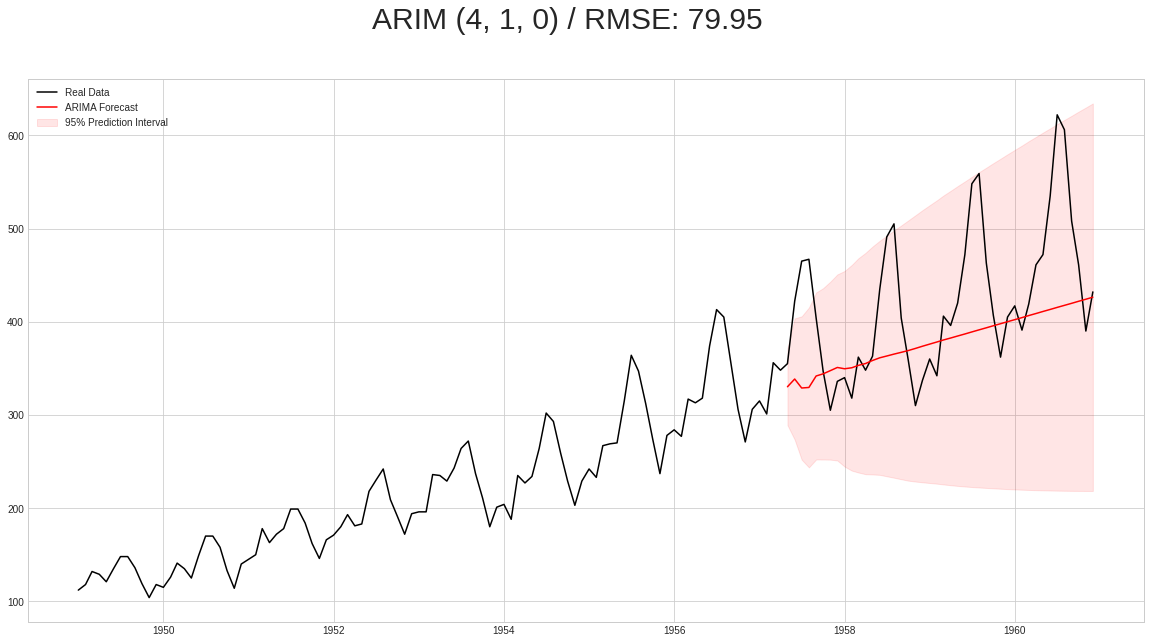

In [36]:
pred_arima_value_tbl = pd.DataFrame(pred_arima_value, index=test_data.index)

plt.figure(figsize=(20,10))
plt.plot(data, label='Real Data', color='k')
plt.plot(pred_arima_value_tbl, label='ARIMA Forecast', color='r')
plt.fill_between(pred_arima_idx, pred_arima_lb, pred_arima_ub, color='r', alpha = 0.1, label = '95% Prediction Interval')
plt.legend(loc='upper left')
plt.suptitle(f'ARIM {res_arima.order} / RMSE: {round(rmse_arima,2)}', size=30)
plt.show()

In [38]:
# ARIMA Model
pred_arima_log = res_arima_log.predict(len(test_log_data), return_conf_int=True)
pred_arima_log_value = np.exp(pred_arima_log[0])
pred_arima_log_ub = np.exp(pred_arima_log[1][:,0])
pred_arima_log_lb = np.exp(pred_arima_log[1][:,1])
pred_arima_log_idx = list(test_data.index)
rmse_arima_log = sqrt(mean_squared_error(test_data, pred_arima_log_value))

rmse_arima_log

82.15406258358142

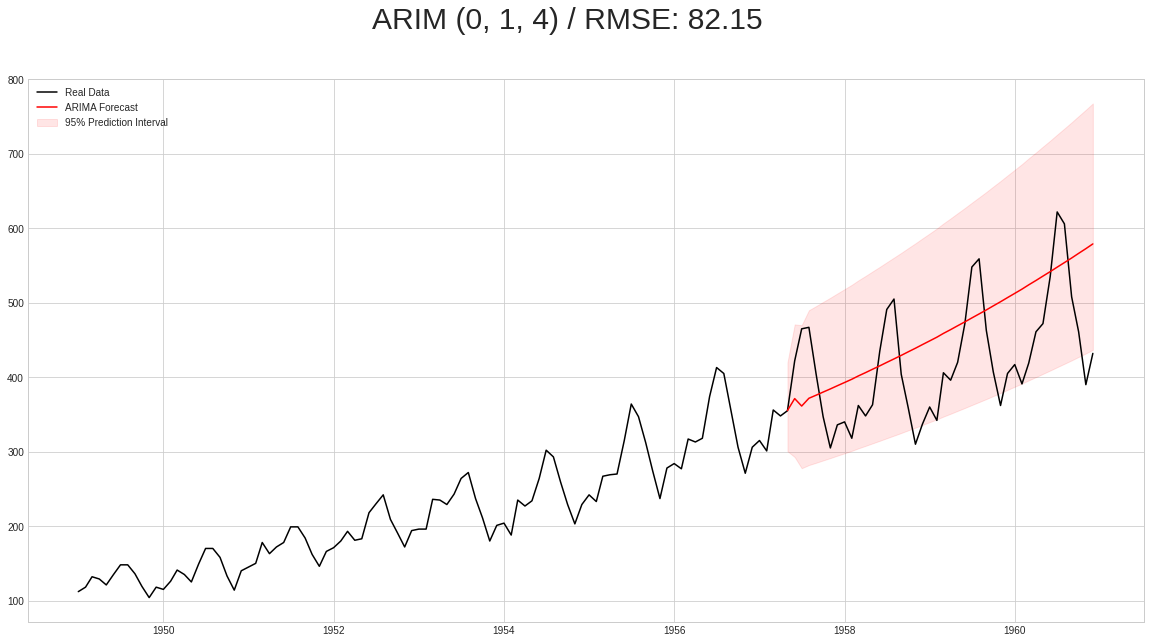

In [40]:
pred_arima_log_value_tbl = pd.DataFrame(pred_arima_log_value, index=test_data.index)

plt.figure(figsize=(20,10))
plt.plot(data, label='Real Data', color='k')
plt.plot(pred_arima_log_value_tbl, label='ARIMA Forecast', color='r')
plt.fill_between(pred_arima_log_idx, pred_arima_log_lb, pred_arima_log_ub, color='r', alpha = 0.1, label = '95% Prediction Interval')
plt.legend(loc='upper left')
plt.suptitle(f'ARIM {res_arima_log.order} / RMSE: {round(rmse_arima_log,2)}', size=30)
plt.show()

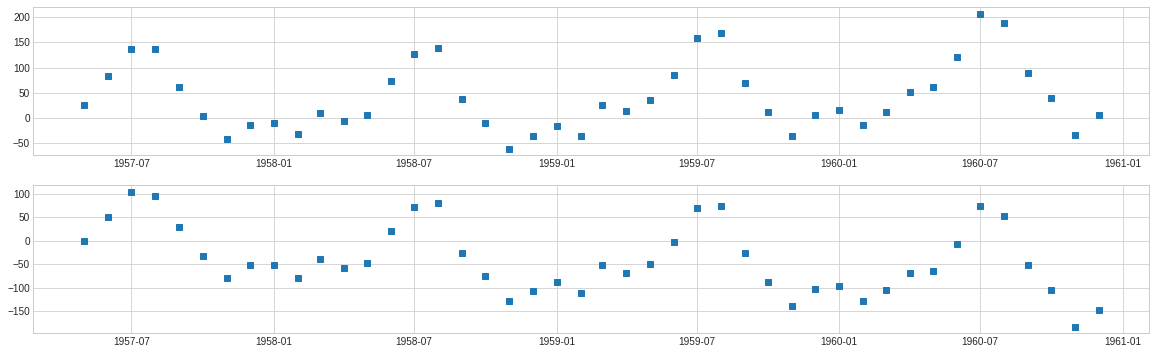

In [41]:
epsilon_arima = test_data['passengers'] - pred_arima_value
epsilon_arima_log = test_data['passengers'] - pred_arima_log_value

plt.figure(figsize=(20,6))
plt.subplot(211)
plt.plot(epsilon_arima, linestyle='None', marker='s')
plt.subplot(212)
plt.plot(epsilon_arima_log, linestyle='None', marker='s')


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


[]

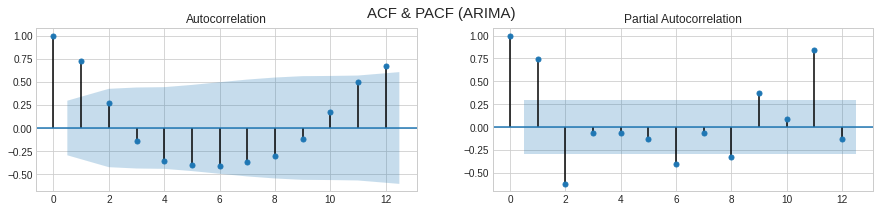

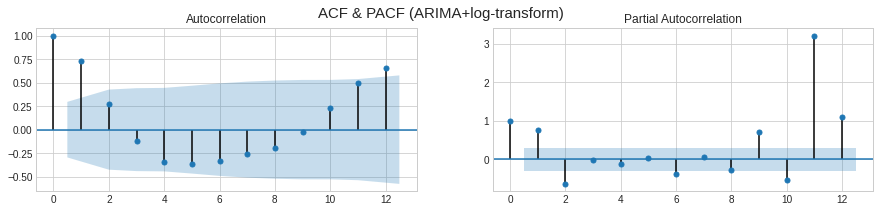

In [42]:
# ACF / PACF
fig, ax = plt.subplots(1,2,figsize=(15,3))
fig.suptitle('ACF & PACF (ARIMA)', size=15)
sm.graphics.tsa.plot_acf(epsilon_arima.squeeze(), lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(epsilon_arima.squeeze(), lags=12, ax=ax[1]);
plt.plot()

fig, ax = plt.subplots(1,2,figsize=(15,3))
fig.suptitle('ACF & PACF (ARIMA+log-transform)', size=15)
sm.graphics.tsa.plot_acf(epsilon_arima_log.squeeze(), lags=12, ax=ax[0])
sm.graphics.tsa.plot_pacf(epsilon_arima_log.squeeze(), lags=12, ax=ax[1]);
plt.plot()

In [43]:
# Stationarity test

res_adf_epsilon_arima = adfuller(epsilon_arima)
res_adf_epsilon_arima_log = adfuller(epsilon_arima_log)
res_kpss_epsilon_arima = kpss(epsilon_arima, lags='auto')
res_kpss_epsilon_arima_log = kpss(epsilon_arima_log, lags='auto')

print('ADF P-value for ARIMA: %f' % res_adf_epsilon_arima[1])
print('ADF P-value for ARIMA+log: %f' % res_adf_epsilon_arima_log[1])
print('KPSS P-value for ARIMA: %f' % res_kpss_epsilon_arima[1])
print('KPSS P-value for ARIMA+log: %f' % res_kpss_epsilon_arima_log[1])

ADF P-value for ARIMA: 0.980521
ADF P-value for ARIMA+log: 0.438057
KPSS P-value for ARIMA: 0.100000
KPSS P-value for ARIMA+log: 0.100000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
